# Design a CNN in Keras with 3 convolutional layers to predict the fashion prodcut class from Fashion-MNIST (as loaded below). Use the history object of the return to Keras's .fit() function to plot and analyze the training [acc] and validation accuracy [val_acc] for each of the 15 epochs. Use 20/80 train/validation split. Hint: You can add the validation data as validation_data in the .fit() function.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import pandas as pd

fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print('X_train.shape')
print(X_train.shape)
print('X_test.shape')
print(X_test.shape)

X_train.shape
(60000, 28, 28)
X_test.shape
(10000, 28, 28)


In [ ]:
from keras.utils import to_categorical

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)  

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)             

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
mod = model.fit(X_train, y_train,validation_split=0.8, batch_size=100, epochs=15,verbose=1,)
acc = mod.history['accuracy']
val_acc =  mod.history['val_accuracy']
print(acc)
print(val_acc)

Train on 11999 samples, validate on 48001 samples
Epoch 1/15
11999/11999 [==============================] - 20s 2ms/step - loss: 0.7550 - accuracy: 0.7231 - val_loss: 0.7405 - val_accuracy: 0.7294
Epoch 2/15
11999/11999 [==============================] - 20s 2ms/step - loss: 0.7482 - accuracy: 0.7171 - val_loss: 0.7256 - val_accuracy: 0.7148
Epoch 3/15
11999/11999 [==============================] - 20s 2ms/step - loss: 0.7295 - accuracy: 0.7343 - val_loss: 0.7130 - val_accuracy: 0.7425
Epoch 4/15
11999/11999 [==============================] - 20s 2ms/step - loss: 0.7193 - accuracy: 0.7352 - val_loss: 0.6890 - val_accuracy: 0.7549
Epoch 5/15
11999/11999 [==============================] - 20s 2ms/step - loss: 0.6983 - accuracy: 0.7431 - val_loss: 0.6931 - val_accuracy: 0.7417
Epoch 6/15
11999/11999 [==============================] - 20s 2ms/step - loss: 0.6841 - accuracy: 0.7496 - val_loss: 0.6855 - val_accuracy: 0.7528
Epoch 7/15
11999/11999 [==============================] - 20s 2ms/st

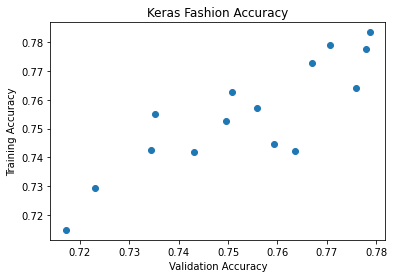

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(acc, val_acc)
plt.ylabel('Training Accuracy')
plt.xlabel('Validation Accuracy')
plt.title('Keras Fashion Accuracy')
plt.show()